# 图像特效-剪纸艺术滤镜

In [1]:
from scipy import signal
import numpy as np
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
from numpy.lib.function_base import histogram

In [13]:
src = cv2.imread('../datas/paper_cutjpg.jpg')
gray = cv2.imread('../datas/paper_cutjpg.jpg',0)
rgb = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)

In [11]:
def paper_cut(src,bgcolor,fgcolor):
    srcf = src.astype(np.float32)
    if len(src.shape) < 3:
        srcf = cv2.cvtColor(src,cv2.COLOR_GRAY2RGB).astype(np.float32)
    gray = cv2.cvtColor(srcf,cv2.COLOR_RGB2GRAY)
    meanval = np.mean(gray)
    dst = np.zeros_like(srcf)
    idxr = (srcf[:,:,0] > meanval) # 背景色
    idxg = (srcf[:,:,1] > meanval)
    idxb = (srcf[:,:,2] > meanval)
    dstr = dst[:,:,0]
    dstg = dst[:,:,1]
    dstb = dst[:,:,2]
    dstr[idxr] = bgcolor[0]
    dstg[idxg] = bgcolor[1]
    dstb[idxb] = bgcolor[2]
    
    dstr[~idxr] = fgcolor[0]
    dstg[~idxg] = fgcolor[1]
    dstb[~idxb] = fgcolor[2]
    dst[dst < 0] = 0
    dst[dst > 255] = 255
    return dst.astype(np.uint8)

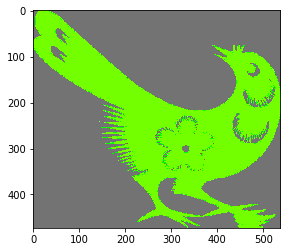

In [18]:
dst = paper_cut(rgb,(115,115,115),(0,255,0))
plt.imshow(dst)